In [3]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from semaxis import *
import numpy as np

# Path to the pretrained Word2Vec model file
#pretrained_model_path = './datasets/GoogleNews-vectors-negative300.bin'
#word2vec_model = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

#pretrained_model_path = 'word2vec.wordvectors2'
pretrained_model_path = 'full_young.wordvectors'


# Load the Word2Vec model
word2vec_model = KeyedVectors.load(pretrained_model_path, mmap='r')

In [4]:
word2vec_model.key_to_index

{'the': 0,
 'and': 1,
 'i': 2,
 'a': 3,
 'to': 4,
 'of': 5,
 'it': 6,
 'is': 7,
 'this': 8,
 'wa': 9,
 'in': 10,
 'book': 11,
 'that': 12,
 'but': 13,
 'her': 14,
 'for': 15,
 'with': 16,
 'she': 17,
 'so': 18,
 'me': 19,
 'not': 20,
 'you': 21,
 'read': 22,
 'like': 23,
 'on': 24,
 'be': 25,
 'character': 26,
 'story': 27,
 'have': 28,
 'my': 29,
 'one': 30,
 'just': 31,
 'really': 32,
 'about': 33,
 'all': 34,
 'he': 35,
 'are': 36,
 'more': 37,
 'at': 38,
 'love': 39,
 'there': 40,
 'what': 41,
 'they': 42,
 'from': 43,
 'out': 44,
 'an': 45,
 'ha': 46,
 'how': 47,
 'up': 48,
 'who': 49,
 'when': 50,
 'because': 51,
 'had': 52,
 'his': 53,
 'if': 54,
 'time': 55,
 'or': 56,
 'much': 57,
 'were': 58,
 'get': 59,
 'would': 60,
 'thing': 61,
 'by': 62,
 'will': 63,
 'im': 64,
 'very': 65,
 'first': 66,
 'series': 67,
 'know': 68,
 'some': 69,
 'good': 70,
 'no': 71,
 'can': 72,
 'way': 73,
 'didnt': 74,
 'their': 75,
 'think': 76,
 'even': 77,
 'loved': 78,
 'them': 79,
 'also': 80,
 '

In [6]:
# Example usage
# word_embedding = word2vec_model['cake']
# print(f'Embedding for "cake": {word_embedding[:5]} ...')

# Find similar words
word_check = "protagonist"
similar_words = word2vec_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

word_check = "love"
similar_words = word2vec_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

Similar words to protagonist: [('mc', 0.8994240164756775), ('protag', 0.8668675422668457), ('protaganist', 0.8627985119819641), ('heroine', 0.8179479837417603), ('protaginist', 0.8140376806259155), ('narratorprotagonist', 0.7992725372314453), ('female', 0.7978363633155823), ('protaganists', 0.7948732972145081)]
Similar words to love: [('lovethis', 0.7764689326286316), ('looooove', 0.7555156946182251), ('loooove', 0.742493212223053), ('lovei', 0.736570417881012), ('equilateral', 0.7351792454719543), ('trianglesbut', 0.7330654263496399), ('headsoverheels', 0.7283716201782227), ('trianglelove', 0.7224496006965637)]


In [7]:
def check_axis(word_pair):
    word_check = word_pair[0]
    similar_words = word2vec_model.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')
    word_check = word_pair[1]
    similar_words = word2vec_model.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')

In [8]:
axis_words = ["evil","good"]
axis = transform_antonym_to_axis(word2vec_model,axis_words,10)
print(cosine_similarity(word2vec_model["evil"],axis))


-0.5480592250823975


In [9]:
def plot_line_graphs(categories, label='plot label'):
    """
    Plot line graphs for multiple categories using matplotlib with tilted x-axis labels and different colors.

    Parameters:
    - categories (list of tuples): Each tuple contains a category name, a list of value names, and a list of values.

    Returns:
    - None
    """
    # Define a list of colors for each category
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Plotting line graphs for each category
    for i, (category, names, values) in enumerate(categories):
        plt.plot(names, values, marker='o', linestyle='-', label=category, color=colors[i])

    # Adding labels and title
    plt.xlabel('Axis pairs')
    plt.ylabel('Average projection values')
    plt.title(label)
    
    # Tilt x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

# # Example usage:
# categories_data = [
#     ('Category 1', ['Label A', 'Label B', 'Label C', 'Label D', 'Label E'], [10, 20, 15, 25, 30]),
#     ('Category 2', ['Label F', 'Label G', 'Label H', 'Label I', 'Label J'], [5, 15, 10, 20, 25]),
# ]

# plot_line_graphs(categories_data)


In [10]:
def evaluate_axis(embedding, axis_pair, evaluation_words,  k=5):
    results = []
    axis = transform_antonym_to_axis(embedding, axis_pair, k)
    for word in evaluation_words:
        results.append(cosine_similarity(embedding[word],axis))
    return np.mean(results)
def evaluate_axes(embedding, axis_pairs, evaluation_words, label="", k=5):
    results = []
    names = []
    values = []
    for axis_pair in axis_pairs:
        values.append(evaluate_axis(embedding, axis_pair, evaluation_words, k=k))
        names.append(axis_pair[0]+"-"+axis_pair[1])
    return (label, names, values)

In [11]:
axis_pairs = np.char.lower(np.loadtxt("axis.csv", dtype=str, delimiter=","))
axis_pairs_con = np.char.lower(np.loadtxt("axis_connatation.csv", dtype=str, delimiter=","))

In [12]:
female_terms = ['she', 'her', 'hers', 'woman', 'girl']
male_terms = ['he', 'him', 'his', 'man', 'guy']
protag_terms = ['protagonist', 'protaganist', 'mc']
random_terms = ['cake', 'god', 'fish', 'bread', 'calendar', 'bicycle', 'window', 'coffee', 'book']

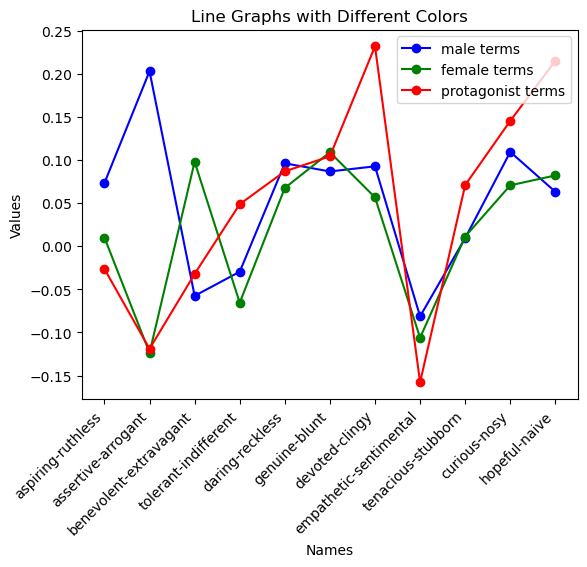

In [13]:
results = []


results.append(evaluate_axes(word2vec_model, axis_pairs_con, male_terms[:7] ,label="male terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs_con, female_terms[:7],label="female terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs_con, protag_terms[:7],label="protagonist terms",k=5))

#results.append(evaluate_axes(word2vec_model, axis_pairs_con, random_terms[:7],label="random terms",k=5))


plot_line_graphs(results)


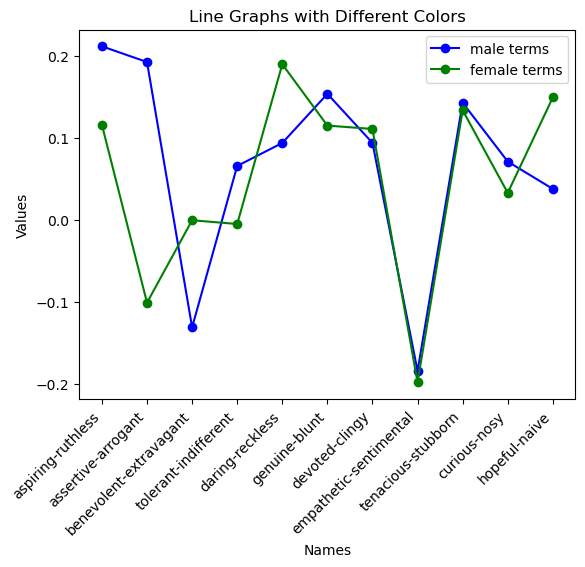

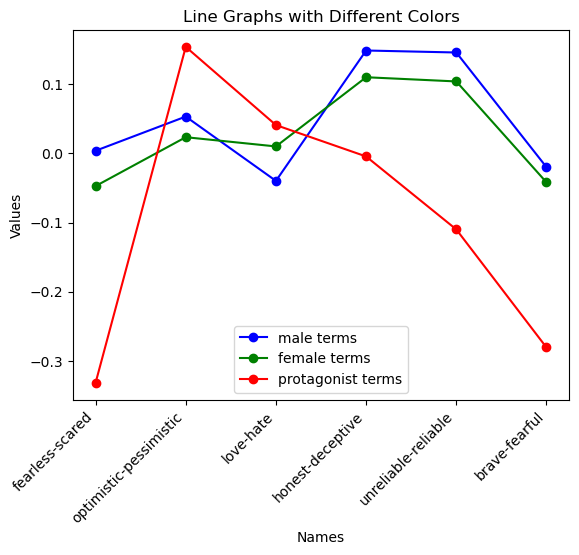

In [14]:
results = []


results.append(evaluate_axes(word2vec_model, axis_pairs, male_terms[:7] ,label="male terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs, female_terms[:7],label="female terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs, protag_terms[:7],label="protagonist terms",k=5))

plot_line_graphs(results)

In [48]:
for pair in axis_pairs_con:
    print("pair:")
    check_axis(pair)

pair:
Similar words to aspiring: [('upandcoming', 0.7040503621101379), ('torgeson', 0.6823428869247437), ('alist', 0.666090726852417), ('enterprising', 0.6610866785049438), ('talented', 0.6588669419288635), ('worldrenowned', 0.6563268899917603), ('adventureloving', 0.6541211605072021), ('indianamerican', 0.6522936224937439)]
Similar words to ruthless: [('merciless', 0.8757107257843018), ('coldhearted', 0.8480731248855591), ('cunning', 0.8208130598068237), ('powerhungry', 0.8133805394172668), ('sadistic', 0.8067458271980286), ('bloodthirsty', 0.7849201560020447), ('calculating', 0.7827754020690918), ('corrupt', 0.7827451229095459)]
pair:
Similar words to assertive: [('selfconfident', 0.8457512855529785), ('selfassured', 0.8296141028404236), ('confident', 0.8229911923408508), ('selfreliant', 0.8113846778869629), ('outspoken', 0.7972593307495117), ('proactive', 0.7963970899581909), ('headstrong', 0.7961126565933228), ('levelheaded', 0.7897952198982239)]
Similar words to arrogant: [('conce